<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **Expressões Regulares**
---



### **Encontrando padrões de texto SEM USAR expressões regulares**


In [8]:
# numero de telefone: 3 numeros, 1 hifen, 3 numeros, 1 hifen e 4 numeros 
# [999-999-9999]

def isPhoneNumber(text):
    if len(text) != 12:
        return False      # not phone number-sized
    for i in range(0, 3):
        if not text[i].isdecimal():
            return False  # not an area code
    if text[3] != '-':
        return False      # does not have first hyphen
    for i in range(4, 7):
        if not text[i].isdecimal():
            return False  # does not have first 3 digits
    if text[7] != '-':
        return False      # does not have second hyphen
    for i in range(8, 12):
        if not text[i].isdecimal():
            return False  # does not have last 4 digits

    return True           # "text" is a phone number!

print('415-555-4242 is a phone number:')
print(isPhoneNumber('415-555-4242'))

print('432-85-4578 is a phone number:')
print(isPhoneNumber('432-85-4578'))

415-555-4242 is a phone number:
True
432-85-4578 is a phone number:
False


In [9]:
message = 'Call me at 415-555-1011 tomorrow. 415-555-9999 is my office.'
for i in range(len(message)):
  chunk = message[i:i+12]
  if isPhoneNumber(chunk):
    print('Phone number found: ' + chunk)
print('Done')

Phone number found: 415-555-1011
Phone number found: 415-555-9999
Done


### **Encontrando padrões de texto COM EXPRESSÕES REGULARES** 


In [10]:
import re

# re.compile() fara um objeto 'Regex' de padrão ser retornado 
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

#phoneNumRegex = re.compile('\\d\\d\\d-\\d\\d\\d-\\d\\d\\d\\d')
#phoneNumRegex = re.compile(r'\d{3}-\d{3}-\d{4}')

# o metodo search retornara 'None' se o padrao regex nao for encontrado
# Se o padrao for encontrado, o metodo search retornara um objeto 'Match'
# Objetos 'Match' tem um metodo group() que retornara o texto correspondente
# extraido da string pesquisada
mo = phoneNumRegex.search('My number is 415-555-4242.')

print('Phone number found: ' + mo.group(0))

Phone number found: 415-555-4242


In [11]:
# agrupando com parênteses
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')
mo = phoneNumRegex.search('My number is 415-555-4242.')

mo.group(1)

'415'

In [12]:
mo.group(2)

'555-4242'

In [13]:
mo.group(0)

'415-555-4242'

In [14]:
mo.group()

'415-555-4242'

In [15]:
areaCode, mainNumber = mo.groups()
print(areaCode)
print(mainNumber)

415
555-4242


In [16]:
# se for necessario usar '(' e ')' --> use '\(' e '\)'
phoneNumRegex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')
mo = phoneNumRegex.search('My phone number is (415) 555-4242.')
mo.group(1)

'(415)'

In [17]:
mo.group(2)

'555-4242'

**O prefixo r**

O prefixo `r` antes da expressão regular evita o pré-processamento da ER pela linguagem.

Colocamos o modificador `r` (do inglês “*raw*”, crú) imediatamente antes das aspas, assim: 

In [18]:
r'\bdia\b'

'\\bdia\\b'

In [19]:
'\bdia\b'

'\x08dia\x08'

Nem sempre é preciso a presença do prefixo. Você irá se deparar com expressões que não utilizam o prefixo.

### **Fazendo a correspondência de vários grupos com pipe**


In [20]:
heroRegex = re.compile (r'Batman|Robin')
mo1 = heroRegex.search('Batman and Robin')
mo1.group()

'Batman'

In [21]:
mo2 = heroRegex.search('Robin and Batman')
mo2.group()

'Robin'

In [22]:
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')
mo = batRegex.search('Batmobile lost a wheel')
mo.group()

'Batmobile'

In [23]:
mo.group(1)

'mobile'

### **Correspondência opcional usando ponto de interrogação**


In [24]:
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [25]:
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()

'Batwoman'

In [26]:
phoneRegex = re.compile(r'(\d\d\d-)?\d\d\d-\d\d\d\d')
mo1 = phoneRegex.search('My number is 415-555-4242')
mo1.group()

'415-555-4242'

In [27]:
# nao tem codigo de area
mo2 = phoneRegex.search('My number is 555-4242')
mo2.group()

'555-4242'

### **Correspondendo a zero ou mais ocorrências usando asterisco**


In [28]:
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [29]:
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()

'Batwoman'

In [30]:
mo3 = batRegex.search('The Adventures of Batwowowowowowowoman')
mo3.group()

'Batwowowowowowowoman'

### **Correspondendo a uma ou mais ocorrências usando o sinal de adição**


In [31]:
batRegex = re.compile(r'Bat(wo)+man')
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [32]:
mo2 = batRegex.search('The Adventures of Batwowowowoman')
mo2.group()

'Batwowowowoman'

In [33]:
mo3 = batRegex.search('The Adventures of Batman')
mo3 == None

True

### **Correspondendo a repetições específicas usando chaves**
 

In [34]:
haRegex = re.compile(r'(Ha){3}')
mo1 = haRegex.search('HaHaHa')
mo1.group()

'HaHaHa'

In [35]:
mo2 = haRegex.search('HaHa')
mo2 == None

True

### **Correspondências greedy (gulosas) e nongreedy (não gulosa)**


In [36]:
# as expressoes regulares em Python sao greedy (gulosas) por default,
# o que significa que, em situacoes ambiguas, a correspondencia sera
# feita com a maior string possivel
greedyHaRegex = re.compile(r'(Ha){3,5}')
mo1 = greedyHaRegex.search('HaHaHaHaHa')
mo1.group()

#(Ha){3,5}
#((Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha)(Ha))

'HaHaHaHaHa'

In [37]:
# na versao nongreedy (nao gulosa) das chaves, que faz a correspondencia
# com a menor string possivel, um ponto de interrogacao '?' deve ser usado
# depois da chave de fechamento
nongreedyHaRegex = re.compile(r'(Ha){3,5}')
mo2 = nongreedyHaRegex.search('HaHaHaHaHa')
mo2.group()

'HaHaHaHaHa'

### **Método findall()**


In [38]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = phoneNumRegex.search('Cell: 415-555-9999 Work: 212-555-0000')
mo.group()

'415-555-9999'

In [39]:
# o metodo findall() retorna as strings de todas as correspondencias
# na string pesquisada, ou seja, uma lista de strings - desde que
# nao haja grupos na expressao regular
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

['415-555-9999', '212-555-0000']

In [40]:
# se houver grupos na expressao regular, findall() retornara uma
# lista de tuplas
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

[('415', '555', '9999'), ('212', '555', '0000')]

### **Classes de caracteres**


In [41]:
# classes de caracteres sao convenientes para reduzir as
# expressoes regulares

# a classe de caracteres [0-5] correspondera somente aos numeros de
# 0 a 5; isso é muito mais conciso do que digitar (0|1|2|3|4|5)

# a expressao regular '\d+\s\w+' correspondera a textos que tenham um ou mais
# digitos (\d+) seguidos de um caractere de espaco em branco (\s) seguido
# de um ou mais caracteres que sejam letra/digito/underscore (\w+)

xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')

['12 drummers',
 '11 pipers',
 '10 lords',
 '9 ladies',
 '8 maids',
 '7 swans',
 '6 geese',
 '5 rings',
 '4 birds',
 '3 hens',
 '2 doves',
 '1 partridge']

### **Criando suas próprias classes de caracteres**


In [42]:
vowelRegex = re.compile(r'[aeiouAEIOU]')
vowelRegex.findall('RoboCop eats baby food. BABY FOOD.')

['o', 'o', 'o', 'e', 'a', 'a', 'o', 'o', 'A', 'O', 'O']

In [43]:
# a classe de caracteres [a-zA-Z0-9] correspondera a todas
# as letras minusculas, as letras maisculas e aos numeros

# Nos colchetes, os simbolos normais de expressao regular nao
# sao interpretados. Por exemplo, a classe de caracteres [0-5.]
# correspondera aos digitos de 0 a 5 e um ponto. 
# Nao eh necessario escrever essa classe como [0-5\.]

# Ao inserir um acento circunflexo (^) logo depois do colchete
# de abertura da classe de caracters, podemos criar uma classe
# negativa de caracteres 
consonantRegex = re.compile(r'[^aeiouAEIOU]')
consonantRegex.findall('RoboCop eats baby food. BABY FOOD.')

['R',
 'b',
 'C',
 'p',
 ' ',
 't',
 's',
 ' ',
 'b',
 'b',
 'y',
 ' ',
 'f',
 'd',
 '.',
 ' ',
 'B',
 'B',
 'Y',
 ' ',
 'F',
 'D',
 '.']

### **Acento circunflexo e o sinal de dólar**


In [44]:
beginsWithHello = re.compile(r'^Hello')
mo = beginsWithHello.search('Hello, world!')
mo.group()

'Hello'

In [45]:
beginsWithHello.search('He said hello.') == None

True

In [46]:
endsWithNumber = re.compile(r'\d$')
mo = endsWithNumber.search('Your number is 42')
mo.group()

'2'

In [47]:
endsWithNumber.search('Your number is forty two.') == None

True

In [48]:
wholeStringIsNum = re.compile(r'^\d+$')
mo = wholeStringIsNum.search('1234567890')
mo.group()

'1234567890'

In [49]:
wholeStringIsNum.search('12345xyz67890') == None

True

In [50]:
wholeStringIsNum.search('123xyz 4567890') == None

True

### **Caractere curinga**


In [51]:
atRegex = re.compile(r'.at')
atRegex.findall('The cat in the hat sat on the flat mat.')

['cat', 'hat', 'sat', 'lat', 'mat']

### **Correspondendo a tudo usando ponto-asterisco**


In [52]:
# podemos usar ponto-asterisco (.*) para indicar "qualquer caractere"
# Lembre-se que o caractere ponto quer dizer "qualquer caractere unico,
# exceto a quebra de linha" e o caractere asterisco quer dizer
# "zero ou mais ocorrencias do caractere anterior"
nameRegex = re.compile(r'First Name: (.*) Last Name: (.*)')
mo = nameRegex.search('First Name: Alexandre Last Name: Alves')
mo.group(1)

'Alexandre'

In [53]:
mo.group(2)

'Alves'

In [54]:
# versao nongreedy (nao gulosa)
nongreedyRegex = re.compile(r'<.*?>')
mo = nongreedyRegex.search('<To serve man> for dinner.>')
mo.group()

'<To serve man>'

In [55]:
# versao greedy (gulosa)
greedyRegex = re.compile(r'<.*>')
mo = greedyRegex.search('<To serve man> for dinner.>')
mo.group()

'<To serve man> for dinner.>'

### **Correspondendo a quebras de linha com o caractere ponto**


In [56]:
noNewlineRegex = re.compile('.*')
noNewlineRegex.search('Serve the public trust.\nProtect the innocent. \nUphold the law.').group()

'Serve the public trust.'

In [57]:
# inclui newline (\n)
newlineRegex = re.compile('.*', re.DOTALL)
newlineRegex.search('Serve the public trust.\nProtect the innocent.\nUphold the law.').group()

'Serve the public trust.\nProtect the innocent.\nUphold the law.'

### **Correspondências sem diferenciar letras maiúsculas de minúsculas**
 

In [58]:
regex1 = re.compile('RoboCop')
regex2 = re.compile('ROBOCOP')
regex3 = re.compile('robOcop')
regex4 = re.compile('RobocOp')

In [59]:
robocop = re.compile(r'robocop', re.I)
#robocop = re.compile(r'robocop', re.IGNORECASE)
robocop.search('RoboCop is part man, part machine, all cop.').group()

'RoboCop'

In [60]:
robocop.search('ROBOCOP protects the innocent.').group()

'ROBOCOP'

In [61]:
robocop.search('Al, why does your programming book talk about robocop so much?').group()

'robocop'

### **Substituindo strings com o método sub()**


In [62]:
namesRegex = re.compile(r'Agent \w+')
namesRegex.sub('CENSORED', 'Agent Alice gave the secret documents to Agent Bob.')

'CENSORED gave the secret documents to CENSORED.'

In [63]:
 # \1, \2, \3  - para grupos
agentNamesRegex = re.compile(r'Agent (\w)\w*')
agentNamesRegex.sub(r'\1****', 'Agent Alice told Agent Carol that Agent Eve knew Agent Bob was a double agent.')

'A**** told C**** that E**** knew B**** was a double agent.'

### **Administrando expressões regulares (regexes) complexas**


In [64]:
phoneRegex = re.compile(r'((\d{3}|\(\d{3}\))?(\s|-|\.)?\d{3}(\s|-|\.)\d{4}(\s*(ext|x|ext.)\s*\d{2,5})?)')

In [65]:
phoneRegex = re.compile(r'''(
    (\d{3}|\(\d{3}\))?            # codigo de area
    (\s|-|\.)?                    # separador
    \d{3}                         # primeiros 3 digitos
    (\s|-|\.)                     # separador
    \d{4}                         # ultimos 4 digitos
    (\s*(ext|x|ext.)\s*\d{2,5})?  # extensao
    )''', re.VERBOSE)

**Referência**:

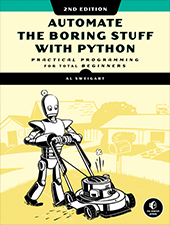

https://automatetheboringstuff.com/2e/chapter7/
